### Initial Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar100

### Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
input_shape = x_train[0].shape

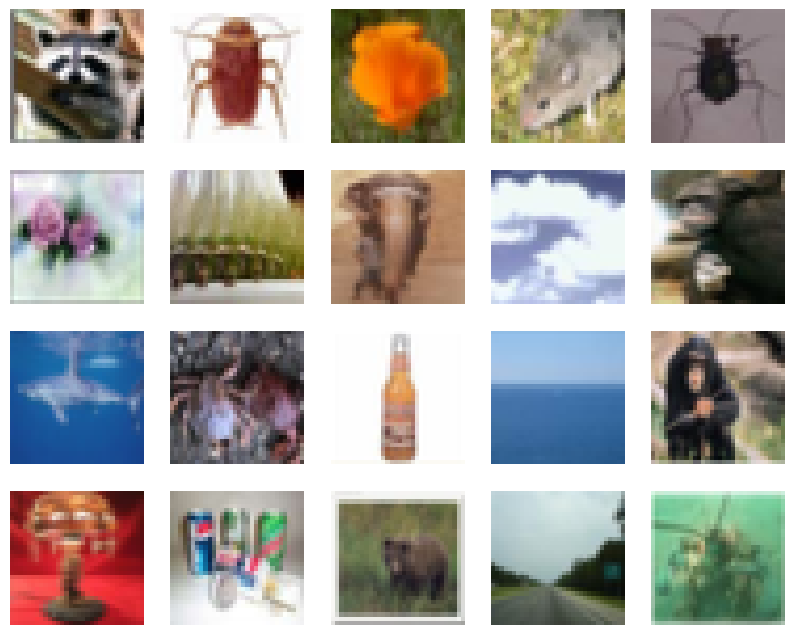

In [5]:
import random

fig = plt.figure(figsize=(10, 8))

for i in range(20):
    fig.add_subplot(4, 5, i+1)
    fig.patch.set_visible(False)
    plt.axis('off')
    plt.imshow(x_train[random.randrange(len(x_train))])

### Feature Engineering

In [6]:
x_train.min()

0

In [7]:
x_test.max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
from keras.utils import to_categorical

y_nunique = len(np.unique(y_train))

y_train_encoded = to_categorical(y_train, y_nunique)
y_test_encoded = to_categorical(y_test, y_nunique)

### Image Generator

In [10]:
from keras.preprocessing.image import ImageDataGenerator

imggen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

### CNN Model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [12]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dense(y_nunique, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 256)         0

In [14]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
batch_size=64

model.fit(
    imggen.flow(x_train, y_train_encoded, batch_size=batch_size),
    steps_per_epoch=len(x_train)//batch_size,
    epochs=200,
    validation_data=(x_test, y_test_encoded),
    callbacks=[early_stop]
)

Epoch 1/200
781/781 [==============================] - 149s 190ms/step - loss: 3.9248 - accuracy: 0.0958 - val_loss: 3.4192 - val_accuracy: 0.1797
Epoch 2/200
781/781 [==============================] - 144s 185ms/step - loss: 3.3055 - accuracy: 0.1965 - val_loss: 3.0201 - val_accuracy: 0.2598
Epoch 3/200
781/781 [==============================] - 151s 194ms/step - loss: 3.0240 - accuracy: 0.2532 - val_loss: 2.8742 - val_accuracy: 0.2839
Epoch 4/200
781/781 [==============================] - 159s 203ms/step - loss: 2.8271 - accuracy: 0.2919 - val_loss: 2.6636 - val_accuracy: 0.3279
Epoch 5/200
781/781 [==============================] - 158s 202ms/step - loss: 2.6646 - accuracy: 0.3219 - val_loss: 2.5178 - val_accuracy: 0.3620
Epoch 6/200
781/781 [==============================] - 158s 202ms/step - loss: 2.5526 - accuracy: 0.3458 - val_loss: 2.3569 - val_accuracy: 0.3968
Epoch 7/200
781/781 [==============================] - 154s 197ms/step - loss: 2.4461 - accuracy: 0.3706 - val_loss: 2

In [16]:
model.save('cifar-100.h5')

### Model Predictions

In [67]:
from keras.models import load_model
from keras.utils import image_utils

cifar_model = load_model('cifar-100.h5')
str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

def image_predict(model, image):
    img = image_utils.load_img(image, target_size=(32, 32, 3))
    img = image_utils.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    
    model_pred = model.predict(img)[0]
    preds = dict(zip(str_labels, model_pred))
    preds_sorted = sorted(preds.items(), key=lambda x:x[1], reverse=True)

    return preds_sorted[:3]

In [73]:
image_predict(cifar_model, 'images/dinosaur.jpg')

1/1 [==============================] - 0s 21ms/step


[('dinosaur', 0.5497071), ('palm_tree', 0.11656643), ('crab', 0.074596934)]

In [75]:
image_predict(cifar_model, 'images/mountain.jpeg')

1/1 [==============================] - 0s 29ms/step


[('mountain', 0.75659394), ('skyscraper', 0.049705315), ('train', 0.04457625)]

In [69]:
image_predict(cifar_model, 'images/tank.jpg')

1/1 [==============================] - 0s 20ms/step


[('tank', 0.8001277), ('motorcycle', 0.10953486), ('beetle', 0.01590754)]